In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy 
import math
%matplotlib inline

In [5]:

x_train, y_train = load_data()

In [6]:
print(type(x_train))
print(x_train)

<class 'numpy.ndarray'>
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [7]:
print(type(y_train))
print(y_train)

<class 'numpy.ndarray'>
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]


In [8]:
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of y_train : {y_train.shape}")

Shape of x_train : (97,)
Shape of y_train : (97,)


In [9]:
#Number of training examples 
print(f"Number of training examples : {len(x_train)}")

Number of training examples : 97


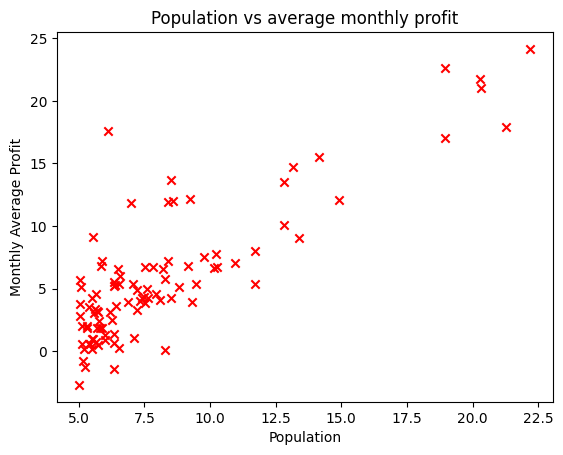

In [10]:
plt.scatter(x_train, y_train, marker ="x", c ="r")
plt.xlabel("Population")
plt.ylabel("Monthly Average Profit")
plt.title("Population vs average monthly profit")
plt.show()

In [11]:
def compute_cost(x,y,w,b):
    """
    Computes the cost function for linear Regression

    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (Scaler) : Parameters of the model

    Returns:
        j (float): The cost of using w, b as parameters for linear regression to fit the data 
        points in x and y
    """

    m = x.shape[0]
    j = 0.0
    for i in range(m):
        f_wb = (w * x[i]) + b
        j = j + (f_wb - y[i])**2
    j = j/(2*m)

    return j

In [25]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f"Cost at initial w: {cost:.3f}")

from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


In [23]:
#Gradient Descent 
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """

    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0

    for i in range(m):
        err = (w * x[i] + b) - y[i]
        dj_dw = dj_dw + (err * x[i])
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m 

    return dj_dw, dj_db

In [26]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print("Gradient at initial w, b (zeros):",tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [27]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [31]:
def gradient_descent(x, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iterations):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(initial_w)
    b = initial_b

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(x,y,w,b)

        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        if i < 100000:
            cost = compute_cost(x, y, w, b)
            J_history.append(cost)

        if i%math.ceil(num_iterations/10) == 0:
            w_history.append(w)
            print(f"iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w, b, J_history, w_history
    
    
    


In [32]:


# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)



iteration    0: Cost     6.74
iteration  150: Cost     5.31
iteration  300: Cost     4.96
iteration  450: Cost     4.76
iteration  600: Cost     4.64
iteration  750: Cost     4.57
iteration  900: Cost     4.53
iteration 1050: Cost     4.51
iteration 1200: Cost     4.50
iteration 1350: Cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [34]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w *x_train[i] + b
    

Text(0.5, 0, 'Population of City in 10,000s')

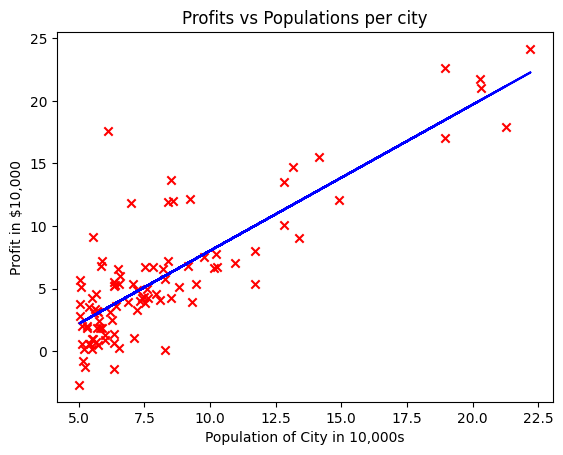

In [39]:

plt.scatter(x_train, y_train , c ="r", marker = "x")
plt.plot(x_train, predicted , c = "b")
plt.title("Profits vs Populations per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

In [40]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
